<a href="https://colab.research.google.com/github/anhtel94/CAP4630---Machine-Learning/blob/master/HW_2/HW2_problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Generate random data

In [0]:
# generate m random pairs (x, y)

m = 100
X = 2 * np.random.rand(m, 2)
y = 4 + 3 * X + np.random.rand(m, 2)

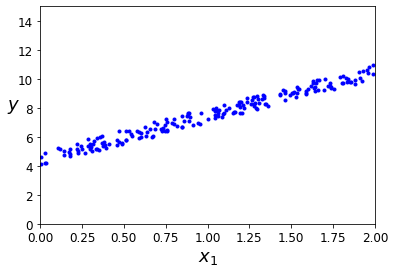

In [97]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [98]:
print(X.shape)

(100, 2)


In [99]:
# show the first 5 rows
print(X[:5, :])

[[1.06448998 0.25148302]
 [0.26542931 0.28708472]
 [1.87963958 1.46579784]
 [0.32476379 0.37669817]
 [1.46165895 0.31232769]]


## Combine bias $b=w_0$ and weight $w_1$

Linear regression predicts $\hat{y}=b + w_1 x_1$. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1)$ and $x=(1, x_1)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [0]:
# add x0 = 1 
X_b = np.column_stack([np.ones((m, 1)), X])

In [101]:
print(X_b.shape)

(100, 3)


In [102]:
# show the first 5 rows
print(X_b[:5, :])

[[1.         1.06448998 0.25148302]
 [1.         0.26542931 0.28708472]
 [1.         1.87963958 1.46579784]
 [1.         0.32476379 0.37669817]
 [1.         1.46165895 0.31232769]]


In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

In [104]:
print(X_new_b)

[[1. 0.]
 [1. 2.]]


# Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(2, 1) 

In [106]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

ValueError: ignored

In [0]:
weight_path_mgd[-1]

In [0]:
weight_path_mgd = np.array(weight_path_mgd)

### Compare the three types

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()

In [0]:
plt.figure(figsize=(12,12))
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([3, 4.5, 2.5, 4])
plt.show()